In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pyplot import figure
import cv2

# SelfOrginizingMap_grid

In [2]:
class SelfOrginizingMap_grid:
    def __init__(self, learning_rate, data, neighborhood, n, epoch):
        self.learning_rate = learning_rate
        self.data = data
        self.neighborhood = neighborhood
        self.n = n
        self.epoch = epoch
        
    def print_graph(self, nlist, slist):
        figure(figsize=(12, 12))
        X = []
        Y = []
        for i in range(len(nlist)):
            for j in range(len(nlist[i])):
                X.append(nlist[i][j][0])
                Y.append(nlist[i][j][1])
                plt.annotate((i, j),(nlist[i][j][0],nlist[i][j][1]))
                plt.plot(nlist[i][j][0],nlist[i][j][1],'*r')
                
        for i in range(self.n):
            Xrow = []
            Yrow = []
            Xcol = []
            Ycol = []
            for j in range(self.n):
                Xrow.append(nlist[i][j][0])
                Yrow.append(nlist[i][j][1])
                Xcol.append(nlist[j][i][0])
                Ycol.append(nlist[j][i][1])
            plt.plot(Xrow, Yrow, "r")
            plt.plot(Xcol, Ycol, "r")
            
        Xp=[]
        Yp=[]
        for n in slist:
            Xp.append(n[0])
            Yp.append(n[1])
        plt.plot(Xp,Yp,'.')
        plt.show()

    def make_nlist(self):
        nueron_lst = []
        row = []
        
        xarr = np.linspace(.4, .6, 10)
        yarr = np.linspace(.4, .6, 10)

        for j in range(self.n):
            row = []
            for i in range(self.n):
                randX = random.uniform(0, 1)
                randY = random.uniform(0, 1)
                row.append([xarr[i],yarr[j]])
            nueron_lst.append(row)
        return nueron_lst

    def SOM(self):
        nueron_lst = self.make_nlist()
        mid = 10

        ker = cv2.getGaussianKernel(mid * 2 + 1,-1)
        ker = ker.dot(ker.T)

        sampled_points = []
        for i in range(self.epoch):
            print("iteration ",i)
            self.print_graph(nueron_lst, sampled_points)
            if i > 0 and i % 7 == 0:
                self.learning_rate /= .5
                self.neighborhood -= 1
            sampled_points = []
            data = self.data.sample(frac=1)
            for index, row in data.iterrows():
                sampled_points.append(np.array([row[0], row[1]]))
                small_dist = np.inf

                # find closest nueron
                for k in range(len(nueron_lst)):
                    for r in range(len(nueron_lst[k])):
                        dist = np.sqrt((row[0] - nueron_lst[k][r][0]) ** 2 + (row[1] - nueron_lst[k][r][1]) ** 2)
                        if dist < small_dist:
                            small_dist = dist
                            spotrow = k
                            spotcol = r

                # update weights 
                for j in range(spotrow - self.neighborhood, spotrow + self.neighborhood + 1):
                    for k in range(spotcol - self.neighborhood, spotcol + self.neighborhood + 1):
                        if 0 <= j < len(nueron_lst) and 0 <= k < len(nueron_lst[j]):
                            new = nueron_lst[j][k] + self.learning_rate * ker[mid-spotrow+j][mid-spotcol+k] * (sampled_points[-1] - nueron_lst[j][k])
                            nueron_lst[j][k] = new
        print("iteration ",i )
        self.print_graph(nueron_lst, sampled_points)

In [3]:
data = pd.DataFrame()
random.seed(1)
for i in range(1000):
    randX = random.uniform(0, 1)
    randY = random.uniform(0, 1)
    data[i] = [randX, randY]
data = data.T

som1 = SelfOrginizingMap_grid(learning_rate=0.7, data=data, neighborhood=10, n=10, epoch=50) 
# som1.SOM()

In [4]:
data_sq = pd.DataFrame()
random.seed(1)
for i in range(1000):
    randX = random.uniform(0, 1)
    randY = random.uniform(0, 1)
    if randX <= 0.5:
        randX = randX ** 2
    else:
        randX = randX ** 0.5
    if randY <= 0.5:
        randY = randY ** 2
    else:
        randY = randY ** 0.5
    data_sq[i] = [randX, randY]
data_sq = data_sq.T

som_sq = SelfOrginizingMap_grid(learning_rate=0.6, data=data_sq, neighborhood=5, n=10, epoch=10) 
# som_sq.SOM()

In [5]:
# make doughnut
doughnut = pd.DataFrame()
random.seed(1)
i = 0
while i < 1000:
    randX = random.uniform(-4, 4)
    randY = random.uniform(-4, 4)
    if 2 <= randX ** 2 + randY ** 2 <= 4:
        doughnut[i] = [randX, randY]
        i += 1
doughnut = doughnut.T

som_doughnut = SelfOrginizingMap_grid(learning_rate=0.9, data=doughnut, neighborhood=5, n=10, epoch=40) 
# som_doughnut.SOM()

In [6]:
data_cubed = pd.DataFrame()
random.seed(1)
for i in range(1000):
    randX = random.uniform(0, 1)
    randY = random.uniform(0, 1)
    data_cubed[i] = [randX ** 3, randY ** 3]
data_cubed = data_cubed.T

som_cubed = SelfOrginizingMap_grid(learning_rate=0.9, data=data_cubed, neighborhood=25, n=10, epoch=100) 
# som_cubed.SOM()

# SelfOrginizingMap_line

In [7]:
class SelfOrginizingMap_line:
    def __init__(self, learning_rate, data, neighborhood, n, epoch):
        self.learning_rate = learning_rate
        self.data = data
        self.neighborhood = neighborhood
        self.n = n
        self.epoch = epoch
        
    def print_graph(self, nlist, slist):
        figure(figsize=(12, 12))
        X = []
        Y = []
        for i in range(len(nlist)):
            X.append(nlist[i][0])
            Y.append(nlist[i][1])
            plt.annotate(i, (nlist[i][0], nlist[i][1]))
            plt.plot(nlist[i][0], nlist[i][1], '*r')

        Xp = []
        Yp = []
        for n in slist:
            Xp.append(n[0])
            Yp.append(n[1])
        plt.plot(Xp, Yp,'.')
        plt.plot(X,  Y)
        plt.show()
    
    def check_new(self, new):
        if new[0] > 1:
            new[0] = 1
        if new[0] < 0:
            new[0] = 0
        if new[1] > 1:
            new[1] = 1
        if new[1] < 0:
            new[1] = 0
        return new
    
    def make_nlist(self):
        nueron_lst = []
        i = 0
        while i < self.n:
            randX = random.uniform(0, 1)
            randY = random.uniform(0, 1)
            if 0.4 <= randX <= 0.6:
                if 0.4 <= randY <= 0.6:
                    nueron_lst.append(np.array([randX, randY])) 
                    i += 1
        return nueron_lst
    
    def SOM_d(self):
        nueron_lst = self.make_nlist()
        mid = 15

        ker = cv2.getGaussianKernel(mid * 2 + 1,-1)

        sampled_points = []
        for i in range(self.epoch):
            print("iteration ",i)
            if i > 0 and i % 3 == 0:
                self.neighborhood -= 1
                if self.neighborhood < 1:
                    self.neighborhood = 1
            if i > 0 and i % 25 == 0:
                self.learning_rate /= 2
                
            sampled_points = []
            data = self.data.sample(frac=1)
            for index, row in data.iterrows():
                sampled_points.append(np.array([row[0], row[1]]))
                small_dist = np.inf

                # find closest nueron
                for n in range(len(nueron_lst)):
                    dist = np.sqrt((row[0] - nueron_lst[n][0]) ** 2 + (row[1] - nueron_lst[n][1]) ** 2)
                    if dist < small_dist:
                        small_dist=dist
                        spot = n
                    
                # update weights of nuerons
                new = nueron_lst[spot] + self.learning_rate * ker[mid] * (sampled_points[-1] - nueron_lst[spot])
                nueron_lst[spot] = new

                # update weights 
                for j in range(1, self.neighborhood):
                    new = nueron_lst[(spot+j) % len(nueron_lst)] + self.learning_rate * ker[mid+j] * (sampled_points[-1] - nueron_lst[(spot+j) % len(nueron_lst)])
                    nueron_lst[(spot+j) % len(nueron_lst)] = new
                    new = nueron_lst[(spot-j) % len(nueron_lst)] + self.learning_rate * ker[mid-j] * (sampled_points[-1] - nueron_lst[(spot-j) % len(nueron_lst)])
                    nueron_lst[(spot-j) % len(nueron_lst)] = new
                    
            if i%10==0:
                print("after iteration ",i )
                self.print_graph(nueron_lst,sampled_points) 
        print("after last iteration " )
        self.print_graph(nueron_lst, sampled_points)
    
    def SOM(self):
        nueron_lst = self.make_nlist()
        mid = 25

        ker = cv2.getGaussianKernel(mid * 2 + 1,-1)

        sampled_points = []
        for i in range(self.epoch):
            print("iteration ",i)
            if i > 0 and i % 3 == 0:
                self.neighborhood -= 1
                if self.neighborhood < 1:
                    self.neighborhood = 1
            if i > 0 and i % 25 == 0:
                self.learning_rate /= 2
                
            sampled_points = []
            data = self.data.sample(frac=1)
            for index, row in data.iterrows():
                sampled_points.append(np.array([row[0], row[1]]))
                small_dist = np.inf

                # find closest nueron
                for n in range(len(nueron_lst)):
                    dist = np.sqrt((row[0] - nueron_lst[n][0]) ** 2 + (row[1] - nueron_lst[n][1]) ** 2)
                    if dist < small_dist:
                        small_dist=dist
                        spot = n
                    
                # update weights of nuerons
                new = nueron_lst[spot] + self.learning_rate * ker[mid] * (sampled_points[-1] - nueron_lst[spot])
                new = self.check_new(new)
                nueron_lst[spot] = new

                # update weights 
                for j in range(1, self.neighborhood):
                    if spot-j >= 0:
                        new = nueron_lst[spot-j] + self.learning_rate * ker[mid-j] * (sampled_points[-1] - nueron_lst[spot-j])
                        new = self.check_new(new)
                        nueron_lst[spot-j] = new
                    if spot+j < len(nueron_lst):
                        new = nueron_lst[spot+j]+ self.learning_rate * ker[mid+j] * (sampled_points[-1] - nueron_lst[spot+j])
                        new = self.check_new(new)
                        nueron_lst[spot+j] = new
            if i%10==0:
                print("after iteration ",i )
                self.print_graph(nueron_lst,sampled_points) 
        print("after last iteration " )
        self.print_graph(nueron_lst, sampled_points)

In [8]:
data_line = pd.DataFrame()
random.seed(1)
for i in range(2000):
    randX = random.uniform(0, 1)
    randY = random.uniform(0, 1)
    data_line[i] = [randX, randY]
data_line = data_line.T

som_line = SelfOrginizingMap_line(learning_rate=0.9, data=data_line, neighborhood=25, n=100, epoch=100) 
# som_line.SOM()

In [9]:
data_corner = pd.DataFrame()
random.seed(1)
for i in range(1000):
    randX = random.uniform(0, 1)
    randY = random.uniform(0, 1)
    if randX <= 0.5:
        randX = randX ** 2
    else:
        randX = randX ** 0.5
    if randY <= 0.5:
        randY = randY ** 2
    else:
        randY = randY ** 0.5
    data_corner[i] = [randX, randY]
data_corner = data_corner.T

som_line = SelfOrginizingMap_line(learning_rate=0.9, data=data_corner, neighborhood=25, n=100, epoch=100) 
# som_line.SOM()

In [10]:
data_cubed = pd.DataFrame()
random.seed(1)
for i in range(1000):
    randX = random.uniform(0, 1)
    randY = random.uniform(0, 1)
    data_cubed[i] = [randX ** 3, randY ** 3]
data_cubed = data_cubed.T

som_line = SelfOrginizingMap_line(learning_rate=0.9, data=data_cubed, neighborhood=25, n=100, epoch=100) 
# som_line.SOM()

iteration  0
after iteration  0


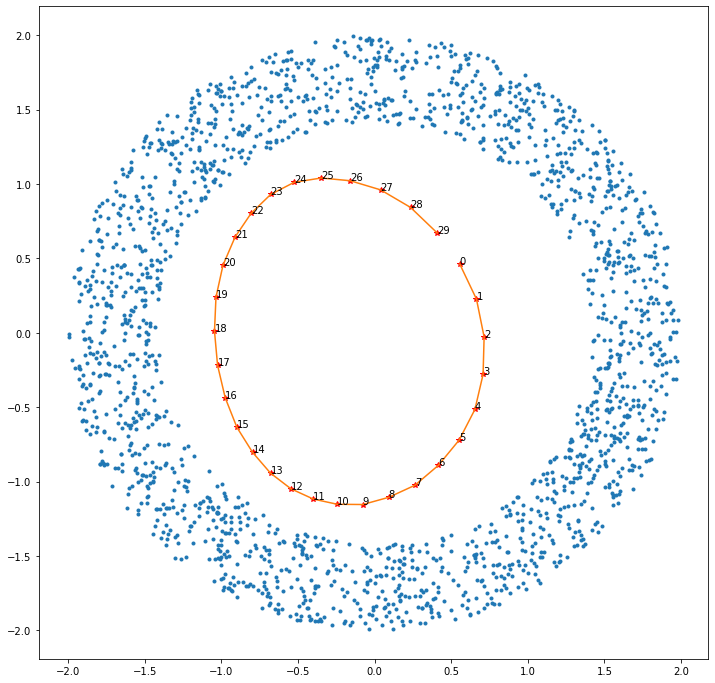

iteration  1
iteration  2
iteration  3
iteration  4
iteration  5
iteration  6
iteration  7
iteration  8
iteration  9
iteration  10
after iteration  10


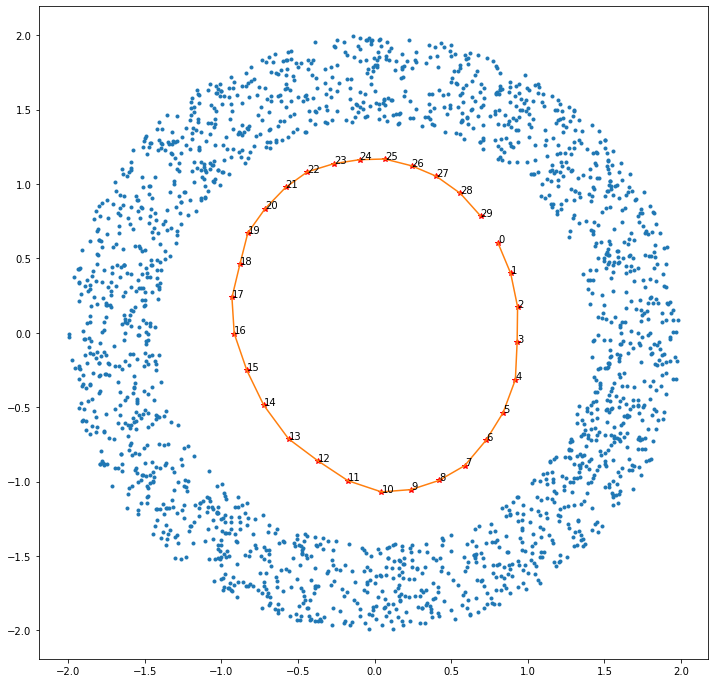

iteration  11
iteration  12
iteration  13
iteration  14
iteration  15
iteration  16
iteration  17
iteration  18
iteration  19
iteration  20
after iteration  20


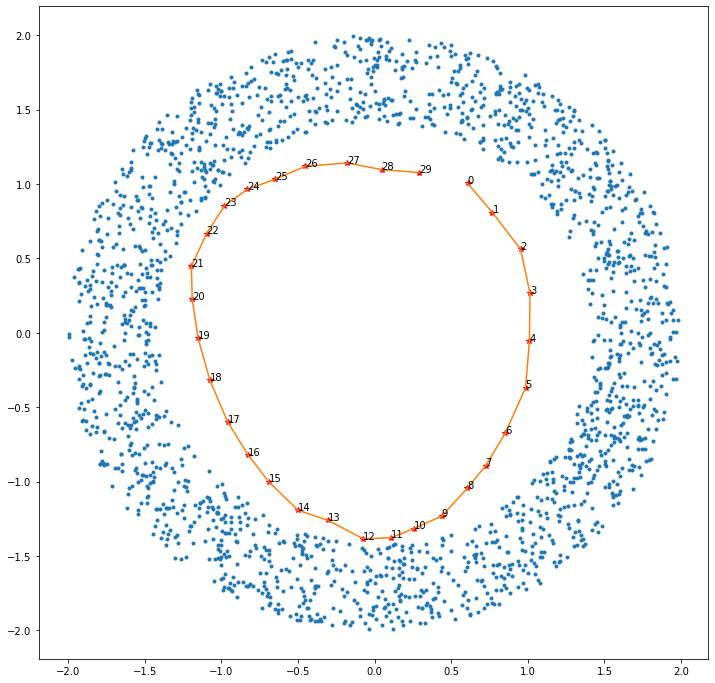

iteration  21
iteration  22
iteration  23
iteration  24
iteration  25
iteration  26
iteration  27
iteration  28


KeyboardInterrupt: 

In [11]:
# make doughnut
doughnut = pd.DataFrame()
random.seed(1)
i = 0
while i < 2000:
#     print(i)
    randX = random.uniform(-4, 4)
    randY = random.uniform(-4, 4)
    if 2 <= randX ** 2 + randY ** 2 <= 4:
        doughnut[i] = [randX, randY]
        i += 1
doughnut = doughnut.T

som_doughnut = SelfOrginizingMap_line(learning_rate=0.9, data=doughnut, neighborhood=15, n=30, epoch=100) 
# som_doughnut.SOM_d()